# Exercise 1

Loading the data from the arff file and converting it into a dataframe

In [121]:
from scipy.io.arff import loadarff
import pandas as pd

# Load the data
data = loadarff('./column_diagnosis.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


Separating the input data and the output data, required for some sklean functions

In [122]:
x = df.drop('class', axis=1)
y = df['class']

Checking the discriminative power of each feature in accordance with f_classif criterion. The higher the value, the more discriminative the feature is.

In [123]:
from sklearn.feature_selection import f_classif

fimportance = f_classif(x, y)

print('features: ', x.columns.values, "\n")
print('scores: ', fimportance[0], "\n")
print('p-values: ', fimportance[1], "\n")

highest_discriminative_power = x.columns.values[fimportance[0].argmax()]
lowest_discriminative_power = x.columns.values[fimportance[0].argmin()]
print('Input variable with highest discriminative power: ', highest_discriminative_power)
print('Input variable with lowest discriminative power: ', lowest_discriminative_power)

features:  ['pelvic_incidence' 'pelvic_tilt' 'lumbar_lordosis_angle' 'sacral_slope'
 'pelvic_radius' 'degree_spondylolisthesis'] 

scores:  [ 98.53970917  21.29919433 114.98284047  89.6439533   16.86693476
 119.12288061] 

p-values:  [8.75284896e-34 2.17687915e-09 5.35732939e-38 2.17567036e-31
 1.12199590e-07 5.11473208e-39] 

Input variable with highest discriminative power:  degree_spondylolisthesis
Input variable with lowest discriminative power:  pelvic_radius


Plotting the class-conditional probability density functions of these two input variables.

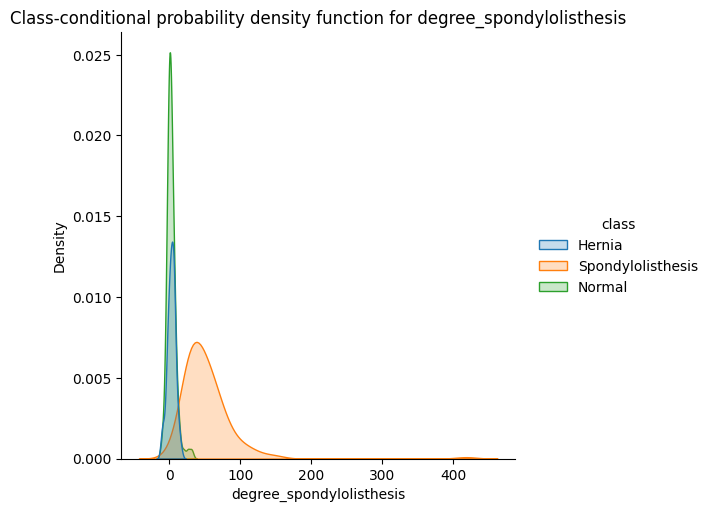

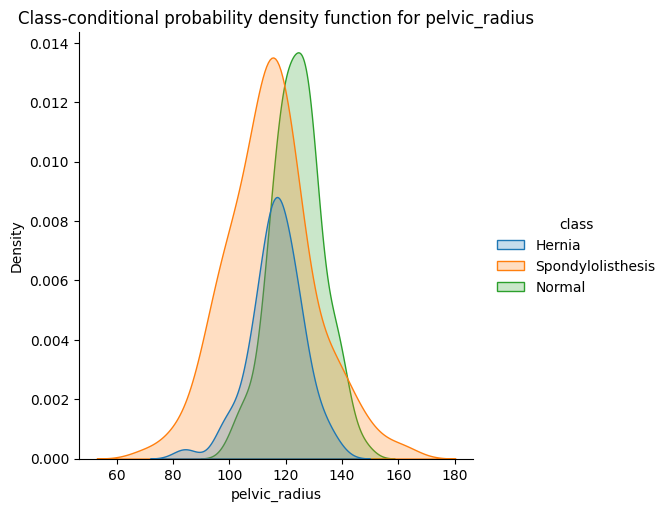

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the class-conditional probability density functions of these two input variables.

sns.displot(data=df, x=highest_discriminative_power, kind='kde', hue='class', fill=True)
plt.title('Class-conditional probability density function for ' + highest_discriminative_power)
plt.show()

sns.displot(data=df, x=lowest_discriminative_power, kind='kde', hue='class', fill=True)
plt.title('Class-conditional probability density function for ' + lowest_discriminative_power)
plt.show()

# Exercise 2

First, we will split the data into training and testing sets. We will use 70% of the data for training and 30% for testing.

In [125]:
from sklearn import metrics, tree
from sklearn.model_selection import train_test_split
import numpy as np

# Split the data into training and test sets
avg_train_accs, avg_test_accs = [], []
# Define the depth limits
depth_limits = [1,2,3,4,5,6,8,10]
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=0, stratify=y)

Now, we will use the training data to train the model. We will use the DecisionTreeClassifier from sklearn.tree to train the model. We will be doing 10 runs of the model and will be averaging the accuracy of the model.

In [126]:
n_runs = 10
for i in depth_limits:
    train_accs, test_accs = [], []
    for j in range(n_runs):
        # train classifier    
        predictor = tree.DecisionTreeClassifier(max_depth=i, random_state=0)
        # fit classifier
        predictor.fit(X_train, y_train)
        # test classifier
        y_pred = predictor.predict(X_test)
        y_pred_train = predictor.predict(X_train)
        
        # calculate accuracy
        train_acc = round(metrics.accuracy_score(y_train, y_pred_train),2)
        test_acc = round(metrics.accuracy_score(y_test, y_pred),2)
        
        train_accs.append(train_acc)
        test_accs.append(test_acc)
    
    avg_train_accs.append(np.mean(train_accs))
    avg_test_accs.append(np.mean(test_accs))

Assess in a single plot both the training and testing accuracies of a decision tree with depth limits 

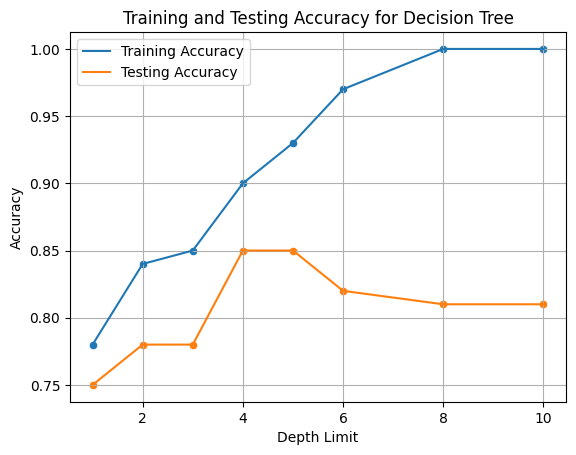

In [127]:
sns.lineplot(x=depth_limits, y=avg_train_accs, label='Training Accuracy')
sns.lineplot(x=depth_limits, y=avg_test_accs, label='Testing Accuracy')
sns.scatterplot(x=depth_limits, y=avg_train_accs)
sns.scatterplot(x=depth_limits, y=avg_test_accs)
plt.grid()
plt.xlabel('Depth Limit')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy for Decision Tree')
plt.show()

# Exercise 4

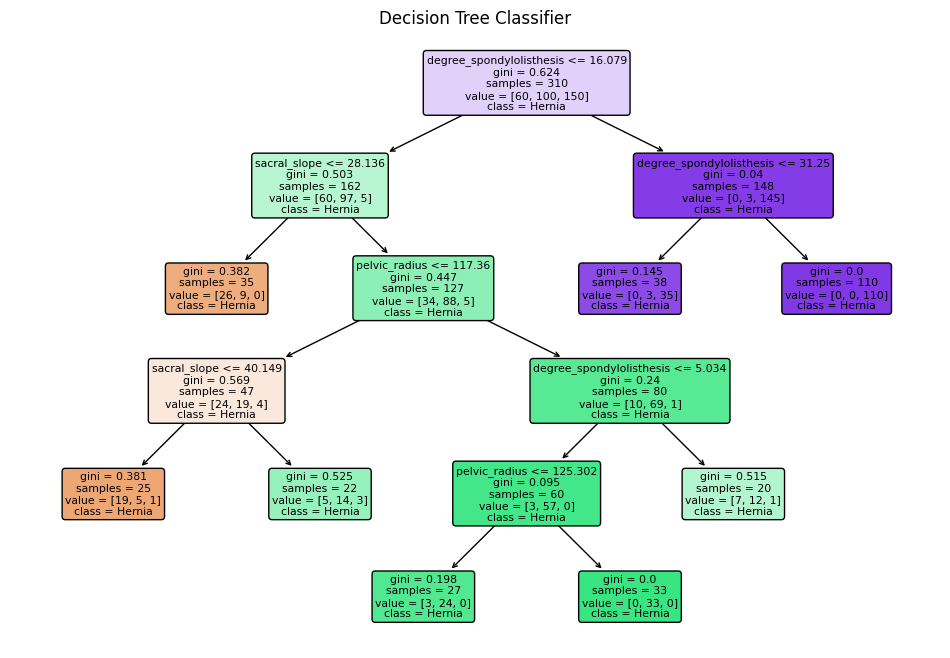

In [144]:
# Create a Decision Tree Classifier with the specified parameters
predictor = tree.DecisionTreeClassifier(random_state=0, min_samples_leaf=20)

# Fit the classifier on all available data
predictor.fit(x, y)

# Plot the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(predictor, filled=True, feature_names=x.columns.values, class_names=y, rounded=True)
plt.title("Decision Tree Classifier")
plt.show()